In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load .env enviroment variables
load_dotenv()

True

In [2]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

# Print current BTC price
btc_response = requests.get(btc_url).json()
#print(btc_response)
btc_price = btc_response['data']['1']['quotes']['CAD']['price']
print(btc_price)

26088.597048


In [3]:
# Print current ETH price
eth_response = requests.get(eth_url).json()
#print(eth_response)
eth_price = eth_response['data']['1027']['quotes']['CAD']['price']
print(eth_price)

1791.940663


In [4]:
# Print total ETH and BTC price
total_eth = eth_price * my_eth
total_btc = btc_price * my_btc
print(f"The current value of all your ETH is ${total_eth:0.2f}")
print(f"The current value of all your BTC is ${total_btc:0.2f}")

The current value of all your ETH is $9497.29
The current value of all your BTC is $31306.32


In [5]:
# Set current amount of shares
agg_shares = 200
spy_shares = 50

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Format current date as ISO format
today = pd.Timestamp("2022-09-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Separate ticker data

SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

df_portfolio

SPY                                               \
                            open   high     low   close    volume trade_count   
timestamp                                                                       
2022-09-22 04:00:00+00:00  376.5  378.3  373.44  374.22  88922900      630401   

                                        AGG                                 \
                                 vwap  open   high      low close   volume   
timestamp                                                                    
2022-09-22 04:00:00+00:00  375.330794  97.9  97.92  97.4039  97.5  7092118   

                                                  
                          trade_count       vwap  
timestamp                                         
2022-09-22 04:00:00+00:00       25072  97.595666

In [6]:
# Print AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'][0])
spy_close_price = float(df_portfolio['SPY']['close'][0])
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.5
Current SPY closing price: $374.22


In [7]:
# Print current value of shares
my_spy_value = spy_close_price * spy_shares
my_agg_value = agg_close_price * agg_shares
print(f"The current value of your SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your AGG shares is ${my_agg_value:0.2f}")

The current value of your SPY shares is $18711.00
The current value of your AGG shares is $19500.00


In [8]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
share_amount = my_spy_value + my_agg_value 
print(share_amount)
cryto_amount = total_btc + total_eth
print(cryto_amount)

# Create savings DataFrame
data = {"amount":[share_amount, cryto_amount]}
df_savings = pd.DataFrame(data, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

38211.0
40803.6019715


,amount
crypto,38211.000000
shares,40803.601972


<AxesSubplot:title={'center':'Diverse Portfolio'}, ylabel='amount'>

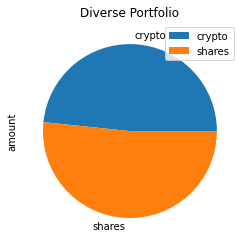

In [9]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Diverse Portfolio")

In [10]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
financial_assets = round(share_amount + cryto_amount,2)
print(financial_assets)

# Validate saving health
if emergency_fund > financial_assets:
    print(f"You have ${financial_assets}. You do not have an emergency fund amount of at least ${emergency_fund}")
elif emergency_fund <= financial_assets:
    print(f"You have ${financial_assets}. You have an emergency fund amount of at least ${emergency_fund}")

36000
79014.6
You have $79014.6. You have an emergency fund amount of at least $36000


In [11]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2017-09-22', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-22', tz='America/New_York').isoformat()

tickers = ["SPY","AGG"]

# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Separate ticker data
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-09-22 04:00:00+00:00  249.06  249.6300  249.020  249.44  51214032   
2017-09-25 04:00:00+00:00  249.16  249.5532  248.080  248.93  57064357   
2017-09-26 04:00:00+00:00  249.45  249.7000  248.805  249.08  54081959   
2017-09-27 04:00:00+00:00  249.89  250.4900  248.870  250.05  79756426   
2017-09-28 04:00:00+00:00  249.73  250.4400  249.630  250.35  44778841   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-22 04:00:00+00:00      139814  249.361126  109.86  109.90  109.75   
2017-09-25 04:00:00+00:00      192970  248.875942  109.85  110.04  109.82   
2017-09-26 04:00:00+00:00      171834  249.209789  109.95  110.02  109.88   
2017-09-27 04:00:00+00:00      215754  249.839037  109.65  109.75  109.60   
2017-09-28 04:00:00+00:00      125235  250.151553  109.58  109.72  109.51   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-09-22 04:00:00+00:00  109.77  1461846        6970  109.810087  
2017-09-25 04:00:00+00:00  110.03  3937638       13206  109.962143  
2017-09-26 04:00:00+00:00  109.99  2749892        9756  109.977579  
2017-09-27 04:00:00+00:00  109.67  3042751        7265  109.673616  
2017-09-28 04:00:00+00:00  109.68  1702507        8599  109.627979

In [12]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
# Printing the simulation input data
MC_30_year.portfolio_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-09-22 04:00:00+00:00  249.06  249.6300  249.020  249.44  51214032   
2017-09-25 04:00:00+00:00  249.16  249.5532  248.080  248.93  57064357   
2017-09-26 04:00:00+00:00  249.45  249.7000  248.805  249.08  54081959   
2017-09-27 04:00:00+00:00  249.89  250.4900  248.870  250.05  79756426   
2017-09-28 04:00:00+00:00  249.73  250.4400  249.630  250.35  44778841   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-22 04:00:00+00:00      139814  249.361126          NaN  109.86   
2017-09-25 04:00:00+00:00      192970  248.875942    -0.002045  109.85   
2017-09-26 04:00:00+00:00      171834  249.209789     0.000603  109.95   
2017-09-27 04:00:00+00:00      215754  249.839037     0.003894  109.65   
2017-09-28 04:00:00+00:00      125235  250.151553     0.001200  109.58   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2017-09-22 04:00:00+00:00  109.90  109.75  109.77  1461846        6970   
2017-09-25 04:00:00+00:00  110.04  109.82  110.03  3937638       13206   
2017-09-26 04:00:00+00:00  110.02  109.88  109.99  2749892        9756   
2017-09-27 04:00:00+00:00  109.75  109.60  109.67  3042751        7265   
2017-09-28 04:00:00+00:00  109.72  109.51  109.68  1702507        8599   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-22 04:00:00+00:00  109.810087          NaN  
2017-09-25 04:00:00+00:00  109.962143     0.002369  
2017-09-26 04:00:00+00:00  109.977579    -0.000364  
2017-09-27 04:00:00+00:00  109.673616    -0.002909  
2017-09-28 04:00:00+00:00  109.627979     0.000091

In [13]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004123,0.998102,1.009826,0.990390,1.007492,1.003967,0.989257,0.996561,0.992387,0.990835,...,1.002222,0.998196,1.011812,1.006149,0.996701,0.992322,1.006151,1.019797,0.995154,0.987348
2,1.000245,0.994313,1.004935,0.998721,1.007807,0.983379,1.002390,1.001974,0.989849,0.986567,...,0.997122,1.002320,1.010913,1.012379,1.008002,0.989631,1.014158,1.014059,0.986055,0.985376
3,0.996952,0.989817,1.005944,0.998204,1.011745,0.980814,0.994408,0.986812,0.986245,0.996633,...,0.990475,1.004784,1.023781,1.011191,1.013589,0.989258,1.020803,1.001098,0.990612,0.981125
4,1.010741,0.988480,1.002691,1.016263,1.011826,1.000688,0.997884,0.983491,0.997801,1.009865,...,0.998651,1.010121,1.031886,0.998686,1.013841,0.998835,1.027239,0.991534,0.981357,0.982626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.157764,5.648210,2.426892,3.086381,3.579059,0.578906,2.119718,2.180706,10.972986,3.642096,...,1.812674,2.670011,2.875155,2.450009,9.198026,3.970241,7.689639,0.878742,1.989012,1.802622
7557,8.104484,5.672328,2.431223,3.082341,3.616222,0.582388,2.128420,2.174348,10.827808,3.679607,...,1.807551,2.687258,2.882408,2.442974,9.265843,3.968285,7.667743,0.886635,1.945899,1.797617
7558,8.142896,5.751653,2.450377,3.103876,3.642242,0.572796,2.133481,2.168108,10.737496,3.700736,...,1.811706,2.676918,2.829075,2.467080,9.274929,3.999422,7.887022,0.884560,1.956893,1.783408
7559,8.103533,5.721081,2.461435,3.088628,3.589829,0.575268,2.132187,2.177308,10.696343,3.705531,...,1.812452,2.699603,2.815134,2.490301,9.351527,4.011548,7.862784,0.881488,1.950868,1.771403


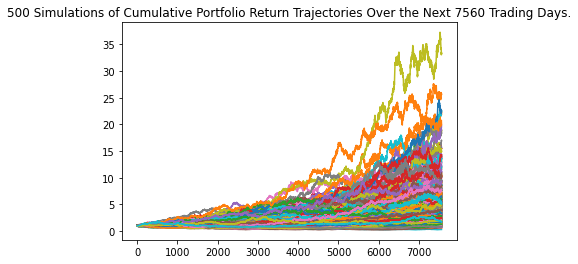

In [14]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30_year_sim_plot.png", bbox_inches="tight")

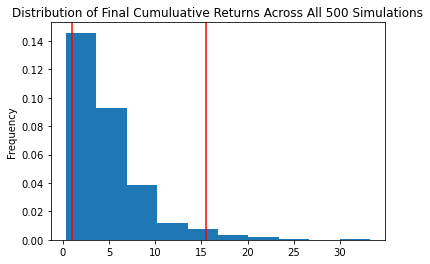

In [15]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_30_year_dist_plot.png',bbox_inches='tight')

In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.947304
std               3.991154
min               0.319126
25%               2.382839
50%               3.814506
75%               6.146428
max              33.252375
95% CI Lower      0.954355
95% CI Upper     15.477888
Name: 7560, dtype: float64


In [17]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $20000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $19087.09 and $309557.76
